In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url='/content/drive/MyDrive/SNA/social media influencers-INSTAGRAM - -DEC 2022.csv'

In [ ]:
ig=pd.read_csv(url)

In [ ]:
ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            1000 non-null   int64 
 1   name            1000 non-null   object
 2   instagram name  981 non-null    object
 3   Category_1      950 non-null    object
 4   Category_2      333 non-null    object
 5   followers       1000 non-null   object
 6   country         999 non-null    object
 7   Eng. (Auth.)    1000 non-null   object
 8   Eng. (Avg.)     1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [ ]:
ig.head()

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M
2,3,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M
3,4,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M
4,5,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M


In [ ]:
ig.tail()

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
995,996,thiago6,Thiago Alcantara,Sports with a ball,NaN,10.4M,United Kingdom,129.9K,222.7K
996,997,soycintiacossio,Cintia Cossio,Modeling,Adult content,6M,Colombia,313.4K,390.6K
997,998,feat.dino,이찬,Lifestyle,NaN,2.7M,South Korea,716.6K,876.4K
998,999,djokernole,Novak Djokovic,Sports with a ball,NaN,11.8M,United States,158.6K,197.5K
999,1000,ravindra.jadeja,Ravindrasinh jadeja,Lifestyle,Sports with a ball,4.8M,India,388.9K,485.1K


In [ ]:
# Check for missing values
print(ig.isnull().sum())

Rank                0
name                0
instagram name     19
Category_1         50
Category_2        667
followers           0
country             1
Eng. (Auth.)        0
Eng. (Avg.)         0
dtype: int64


In [ ]:
# Fill missing Instagram names with name
ig['instagram name']=ig['instagram name'].fillna(ig['name'])

#Fill missing category_1 with category_2
ig['Category_1']=ig['Category_1'].fillna('Unknown')
ig['Category_2']=ig['Category_2'].fillna('Unknown')

# Fill missing audience country with 'Unknown'
ig['country']=ig['country'].fillna('Unknown')
print(ig.isnull().sum())


Rank              0
name              0
instagram name    0
Category_1        0
Category_2        0
followers         0
country           0
Eng. (Auth.)      0
Eng. (Avg.)       0
dtype: int64


In [ ]:
# Convert Text-based Numbers ("5.3M", "450K") to Numeric Format
def convert_to_number(value):
    if isinstance(value, str):
        value = value.strip()
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6  # Convert Millions
        elif 'K' in value:
            return float(value.replace('K', '')) * 1e3  # Convert Thousands
    return pd.NA  # Handle missing or invalid values

# Convert relevant columns
ig['followers'] = ig['followers'].apply(convert_to_number)
ig['Eng. (Auth.)'] = ig['Eng. (Auth.)'].apply(convert_to_number)
ig['Eng. (Avg.)'] = ig['Eng. (Avg.)'].apply(convert_to_number)

In [ ]:
ig.head()

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
0,1,leomessi,Leo Messi,Sports with a ball,Family,409800000.0,Argentina,17800000.0,23400000.0
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,Unknown,523000000.0,India,11700000.0,14700000.0
2,3,neymarjr,NJ 🇧🇷,Sports with a ball,Unknown,198900000.0,Brazil,6700000.0,9500000.0
3,4,kyliejenner,Kylie 🤍,Fashion,Modeling,376300000.0,United States,2700000.0,4300000.0
4,5,kendalljenner,Kendall,Modeling,Fashion,268000000.0,United States,3200000.0,5000000.0


In [ ]:
# Convert to DataFrame:Helps in data manipulation (filtering, grouping, etc)
ig = pd.DataFrame(ig)

#Create Graph
G = nx.Graph()

# Assign distinct colors to categories
categories = ig['Category_1'].unique()
category_color_map = {category: plt.cm.tab10(i) for i, category in enumerate(categories)}

# Add nodes with category attribute
# Loops through each row in the dataset.
# Adds an influencer (node) to the graph with:
# name as the node ID.
# category as an attribute.
for _, row in ig.iterrows():
    G.add_node(row['name'], category=row['Category_1'])

#Connecting nodes based on categories (assumption: same category = likely connection)
for category in categories:
    # Get all influencers in this category
    nodes = ig[ig['Category_1'] == category]['name'].tolist()
    for i in range(len(nodes)): # Loop through each influencer
        for j in range(i + 1, len(nodes)): # Create pairwise connections
            G.add_edge(nodes[i], nodes[j])  # Add an edge between two influencers

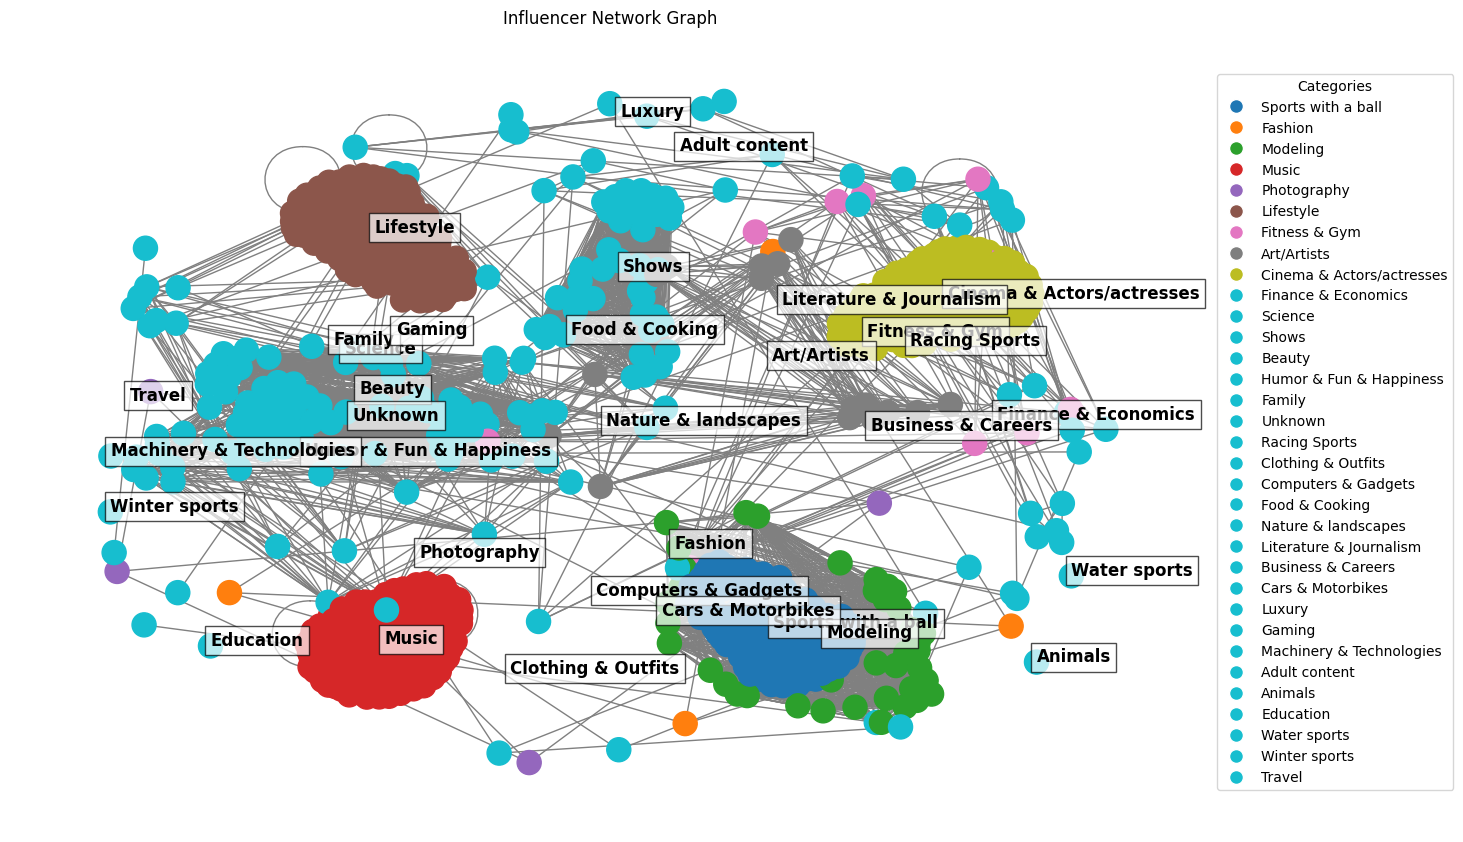

In [ ]:
# Assign colors based on category
node_colors = [category_color_map[G.nodes[node]['category']] for node in G.nodes()]

# Positioning & Visualization
plt.figure(figsize=(12, 8))
# Compute node positions using spring layout
pos = nx.spring_layout(G, k=0.5)

# Draw network
nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=300, edge_color="gray")

# Draw cluster names at their average position
for category in categories:
    category_nodes = [node for node in G.nodes() if G.nodes[node]['category'] == category]
    if category_nodes:
        avg_x = sum(pos[node][0] for node in category_nodes) / len(category_nodes)
        avg_y = sum(pos[node][1] for node in category_nodes) / len(category_nodes)
        # Places the category name at the center of the cluster.
        plt.text(avg_x, avg_y, category, fontsize=12, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

# Add Legend
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markersize=10,
                              markerfacecolor=category_color_map[category]) for category in categories]
# places the legend outside the graph:
plt.legend(legend_patches, categories, loc="center left", bbox_to_anchor=(1, 0.5), title="Categories")

plt.title("Influencer Network Graph")
plt.show()

In [ ]:
# Compute Centrality Measures
degree_centrality = nx.degree_centrality(G)  # Direct connections
closeness_centrality = nx.closeness_centrality(G)  # Influence reach
betweenness_centrality = nx.betweenness_centrality(G)  # Control over information flow
eigenvector_centrality = nx.eigenvector_centrality(G)  # Importance in the network

# Function to print top 10 nodes for a given centrality measure
def print_top_influencers(centrality_dict, centrality_name):
    top_influencers = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"\nTop 10 Influencers by {centrality_name}:")
    for rank, (node, value) in enumerate(top_influencers, start=1):
        print(f"{rank}. Node {node} - {centrality_name}: {value:.4f}")

# Print results for each centrality measure
print_top_influencers(degree_centrality, "Degree Centrality")
print_top_influencers(closeness_centrality, "Closeness Centrality")
print_top_influencers(betweenness_centrality, "Betweenness Centrality")
print_top_influencers(eigenvector_centrality, "Eigenvector Centrality")



Top 10 Influencers by Degree Centrality:
1. Node offsetyrn - Degree Centrality: 0.2333
2. Node frenchmontana - Degree Centrality: 0.2333
3. Node jaybnow.hr - Degree Centrality: 0.2333
4. Node arianagrande - Degree Centrality: 0.2313
5. Node taylorswift - Degree Centrality: 0.2313
6. Node thv - Degree Centrality: 0.2313
7. Node lalalalisa_m - Degree Centrality: 0.2313
8. Node billieeilish - Degree Centrality: 0.2313
9. Node justinbieber - Degree Centrality: 0.2313
10. Node jennierubyjane - Degree Centrality: 0.2313

Top 10 Influencers by Closeness Centrality:
1. Node arianagrande - Closeness Centrality: 0.2313
2. Node taylorswift - Closeness Centrality: 0.2313
3. Node thv - Closeness Centrality: 0.2313
4. Node lalalalisa_m - Closeness Centrality: 0.2313
5. Node billieeilish - Closeness Centrality: 0.2313
6. Node justinbieber - Closeness Centrality: 0.2313
7. Node jennierubyjane - Closeness Centrality: 0.2313
8. Node iamcardib - Closeness Centrality: 0.2313
9. Node karolg - Closeness Ce

In [ ]:
# Compute Global Clustering Coefficient (Average Clustering)
global_clustering_coefficient = nx.average_clustering(G)
print(f"Global Clustering Coefficient: {global_clustering_coefficient}")

Global Clustering Coefficient: 0.9848637739656912


In [ ]:
# Compute Local Clustering Coefficient for each node
local_clustering_coefficients = nx.clustering(G)

# Display top 10 nodes with highest local clustering coefficients
top_local_clustering = sorted(local_clustering_coefficients.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Local Clustering Coefficient:")
for node, coef in top_local_clustering:
    print(f"Node {node} - Local Clustering Coefficient: {coef}")

Top 10 Nodes by Local Clustering Coefficient:
Node leomessi - Local Clustering Coefficient: 1.0
Node cristiano - Local Clustering Coefficient: 1.0
Node neymarjr - Local Clustering Coefficient: 1.0
Node kyliejenner - Local Clustering Coefficient: 1.0
Node kendalljenner - Local Clustering Coefficient: 1.0
Node arianagrande - Local Clustering Coefficient: 1.0
Node selenagomez - Local Clustering Coefficient: 1.0
Node kimkardashian - Local Clustering Coefficient: 1.0
Node k.mbappe - Local Clustering Coefficient: 1.0
Node taylorswift - Local Clustering Coefficient: 1.0


**Detect Communities & Subgroups**

In [ ]:
import itertools
from networkx.algorithms.community import girvan_newman

# Run the Girvan-Newman algorithm
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)  # Extract first split
community_list = [list(community) for community in top_level_communities]  # Convert to list

# Assign a unique color to each community
colors = itertools.cycle(plt.cm.tab10.colors)  # Cycle through 10 different colors
community_color_map = {node: color for color, community in zip(colors, community_list) for node in community}

# Draw separate graphs for each community
for i, community in enumerate(community_list):
    subgraph = G.subgraph(community)  # Extract subgraph for the community
    pos = nx.spring_layout(subgraph, k=0.5)  # Layout for visualization

    # Plot each community separately
    plt.figure(figsize=(8, 6))
    nx.draw(subgraph, pos, node_color=[community_color_map[node] for node in subgraph.nodes()],
            with_labels=True, node_size=500, edge_color="gray")

    # Title for each graph
    plt.title(f"Community {i+1}")
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

Initial Activated Nodes: [5, 4]
Final Activated Nodes: {4, 5}
Influence Flow Path (Edges): []


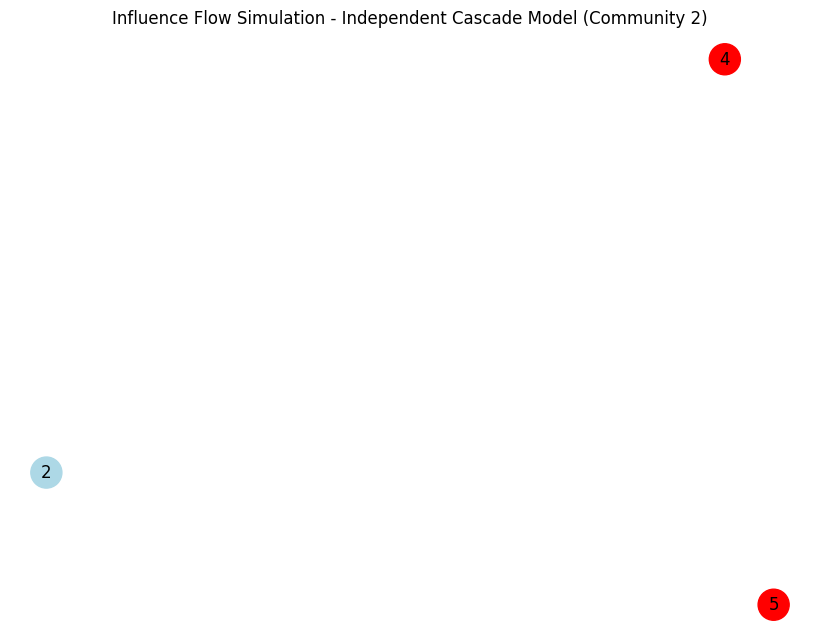

In [ ]:
import random
import matplotlib.pyplot as plt

# Select the second community from the detected communities
community = community_list[1]

# Extract subgraph for the community
subgraph = G.subgraph(community)

# Define the initial set of activated nodes (randomly select 2 nodes from the community)
initial_activated = random.sample(list(subgraph.nodes), 2)

# Assign random activation probabilities to the edges
activation_probabilities = {}
for u, v in subgraph.edges():
    activation_probabilities[(u, v)] = random.random()  # Random value between 0 and 1

# Initialize the set of activated nodes
activated_nodes = set(initial_activated)

# Define the independent cascade model
def independent_cascade_model(graph, initial_activated_nodes, activation_probabilities):
    activated = set(initial_activated_nodes)  # Set of initially activated nodes
    new_activated = set(initial_activated_nodes)  # Nodes activated in the current round
    influence_paths = []  # To store the influence paths (edges where activation happened)

    # Run the process until no new nodes are activated
    while new_activated:
        current_activated = set()
        for node in new_activated:
            for neighbor in graph.neighbors(node):
                # Only attempt activation if the neighbor is not already activated
                if neighbor not in activated:
                    # Check if the activation succeeds based on the probability
                    if random.random() < activation_probabilities.get((node, neighbor), 0.5):
                        current_activated.add(neighbor)
                        influence_paths.append((node, neighbor))  # Record the activation path

        # Update activated nodes and new_activated for the next round
        activated.update(current_activated)
        new_activated = current_activated

    return activated, influence_paths

# Run the Independent Cascade Model
final_activated_nodes, influence_paths = independent_cascade_model(subgraph, initial_activated, activation_probabilities)

# Show the results
print("Initial Activated Nodes:", initial_activated)
print("Final Activated Nodes:", final_activated_nodes)
print("Influence Flow Path (Edges):", influence_paths)

# Visualize the influence flow
plt.figure(figsize=(8, 6))

# Set node colors based on activation status
node_colors = ['red' if node in final_activated_nodes else 'lightblue' for node in subgraph.nodes()]

# Draw the subgraph
nx.draw(subgraph, with_labels=True, node_color=node_colors, node_size=500, edge_color="gray")

# Highlight the edges along the influence flow
influence_edges = [(u, v) for u, v in influence_paths]
nx.draw_networkx_edges(subgraph, pos=nx.spring_layout(subgraph, k=0.5), edgelist=influence_edges, edge_color='orange', width=2)

plt.title("Influence Flow Simulation - Independent Cascade Model (Community 2)")
plt.show()


In [ ]:
from networkx.algorithms.community import girvan_newman, modularity

# Run the Girvan-Newman algorithm
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)  # Extract first community split
community_list = [list(community) for community in top_level_communities]  # Convert to list of lists

# Compute modularity
modularity_score = modularity(G, top_level_communities)

# Print modularity result
print(f"Modularity Score: {modularity_score:.4f}")  # Rounded to 4 decimal places


Modularity Score: 0.7332


In [ ]:
import random

def independent_cascade(G, initial_active_nodes, activation_prob):
    """
    Simulates the Independent Cascade Model (ICM) on a given graph.

    Parameters:
    - G: NetworkX graph
    - initial_active_nodes: List of initially activated nodes
    - activation_prob: Dictionary with edges as keys and probabilities as values { (v,w): p_vw }

    Returns:
    - final_activated_nodes: Set of nodes that got activated
    """
    # Step 1: Initialize activated nodes set
    activated_nodes = set(initial_active_nodes)
    new_activations = set(initial_active_nodes)

    # Step 2: Continue spreading influence until no more activations
    while new_activations:
        next_activations = set()
        for node in new_activations:
            for neighbor in G.neighbors(node):
                if neighbor not in activated_nodes:
                    # Step 3: Generate a random probability
                    rand_value = random.random()

                    # Step 4: Check if activation happens
                    if rand_value < activation_prob.get((node, neighbor), 0.1):  # Default 0.1 if missing
                        next_activations.add(neighbor)
                        activated_nodes.add(neighbor)

        # Step 5: Update activated nodes for the next iteration
        new_activations = next_activations

    return activated_nodes

# Load your influencer graph (assuming G is already created)
# Define an initial seed set (e.g., top influencers by degree centrality)
seed_nodes = ["virat.kohli", "khaby00", "kingjames"]  # Example initial influencers

# Define activation probabilities for edges (if available)
activation_probs = {edge: 0.1 for edge in G.edges()}  # Assuming a default probability of 0.1

# Apply Independent Cascade Model
final_spread = independent_cascade(G, seed_nodes, activation_probs)

# Print results
print(f"Total activated nodes: {len(final_spread)}")
print(f"Activated nodes: {final_spread}")


Total activated nodes: 133
Activated nodes: {'shikhardofficial', 'realmadrid', 'ronaldinho', 'lukamodric10', 'casemiro', 'tombrady', 'bleacherreport', 'chelseafc', 'riyadmahrez26.7', 'championsleague', 'noahbeck', 'bounouyassine_bono', 'manchesterunited', 'khaby00', 'mterstegen1', 'karimbenzema', 'neymarjr', 'lakers', 'marcelotwelve', 'marcinho11', 'sachintendulkar', 'flamengo', 'mosalah', 'klaythompson', 'rohitsharma45', 'obj', 'm10_official', 'cbf_futebol', 'alidaei', 'andresiniesta8', 'hm_son7', 'easportsfifa', 'giannis_an34', 'premierleague', 'djokernole', 'toni.kr8s', 'nba', 'vinijr', 'fcbarcelona', 'kunaguero', 'auba', 'kingjames', 'alishalehmann7', 'o.dembele7', 'rodridepaul', 'thiago6', 'thibautcourtois', 'alvaromorata', 'lucaspaqueta', 'chetri_sunil11', 'raphaelvarane', 'aliiiiiiiikarimi8', 'klrahul', 'kaka', 'sadiomaneofficiel', 'richarlison', 'iscoalarcon', 'houseofhighlights', 'angeldimariajm', 'mancity', 'hazardeden_10', 'davidalaba', 'leomessi', 'garethbale11', 'danialves

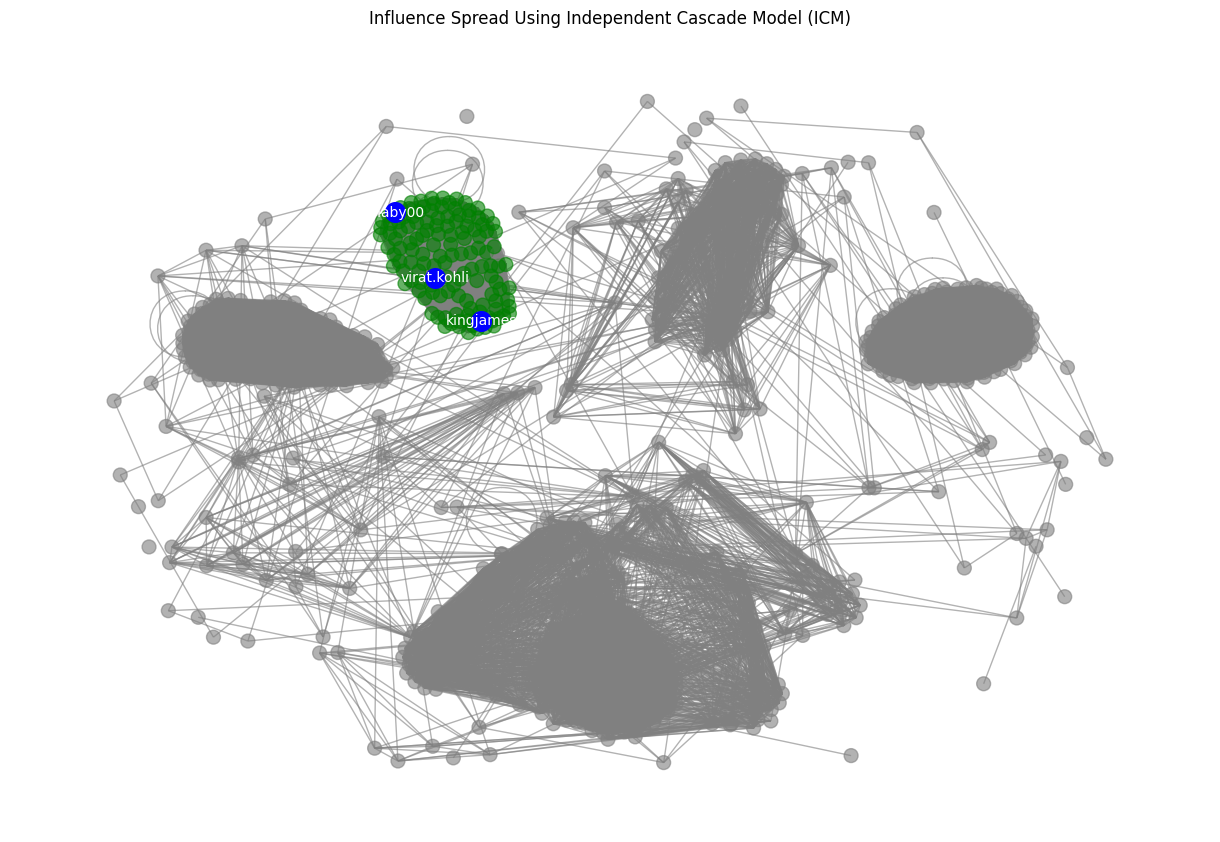

In [ ]:
def visualize_icm(G, seed_nodes, activated_nodes):

    plt.figure(figsize=(12, 8))

    # Compute node positions
    pos = nx.spring_layout(G, k=0.5)

    # Assign colors based on activation status
    node_colors = []
    for node in G.nodes():
        if node in seed_nodes:
            node_colors.append("blue")  # Initial influencers
        elif node in activated_nodes:
            node_colors.append("green")  # Spread nodes
        else:
            node_colors.append("gray")  # Inactive nodes

    # Draw the graph
    nx.draw(G, pos, with_labels=False, node_size=100, node_color=node_colors, edge_color="gray", alpha=0.6)

    # Draw seed nodes with labels
    nx.draw_networkx_nodes(G, pos, nodelist=seed_nodes, node_color="blue", node_size=200)
    nx.draw_networkx_labels(G, pos, labels={node: node for node in seed_nodes}, font_size=10, font_color="white")

    plt.title("Influence Spread Using Independent Cascade Model (ICM)")
    plt.show()

# Run the ICM model
final_spread = independent_cascade(G, seed_nodes, activation_probs)

# Visualize results
visualize_icm(G, seed_nodes, final_spread)


In [ ]:
import networkx as nx
import numpy as np

def compute_evaluation_metrics(G, seed_nodes, activated_nodes, activation_steps):
    num_nodes = len(G.nodes)

    # 1. Spread Metrics
    cascade_size = len(activated_nodes)
    spread_ratio = cascade_size / num_nodes

    # 2. Temporal Metrics
    if activation_steps:
        time_to_peak = max(activation_steps.values(), default=0)
        mean_activation_time = np.mean(list(activation_steps.values())) if activation_steps else 0
    else:
        time_to_peak, mean_activation_time = 0, 0

    # 3. Structural Influence Metrics
    avg_betweenness = np.mean([nx.betweenness_centrality(G)[node] for node in activated_nodes])
    avg_clustering = np.mean([nx.clustering(G, node) for node in activated_nodes])

    # Display results
    print(f"Cascade Size: {cascade_size}")
    print(f"Spread Ratio: {spread_ratio:.4f}")
    print(f"Time to Peak Activation: {time_to_peak}")
    print(f"Mean Activation Time: {mean_activation_time:.4f}")
    print(f"Average Betweenness of Activated Nodes: {avg_betweenness:.4f}")
    print(f"Average Clustering Coefficient of Activated Nodes: {avg_clustering:.4f}")

# Example usage:
activation_steps = {node: step for step, nodes in enumerate(final_spread) for node in nodes}
compute_evaluation_metrics(G, seed_nodes, final_spread, activation_steps)


Cascade Size: 133
Spread Ratio: 0.1342
Time to Peak Activation: 132
Mean Activation Time: 115.2368
Average Betweenness of Activated Nodes: 0.0000
Average Clustering Coefficient of Activated Nodes: 1.0000


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import random

def compute_classification_metrics(G, seed_nodes, predicted_activated_nodes, ground_truth_activated_nodes):
    all_nodes = set(G.nodes())

    # Define True Positives, False Positives, False Negatives, True Negatives
    TP = len(predicted_activated_nodes & ground_truth_activated_nodes)  # Correctly activated
    FP = len(predicted_activated_nodes - ground_truth_activated_nodes)  # Incorrectly activated
    FN = len(ground_truth_activated_nodes - predicted_activated_nodes)  # Missed activations
    TN = len(all_nodes - (predicted_activated_nodes | ground_truth_activated_nodes))  # Correctly inactive

    # Calculate Precision, Recall, F1-score, Accuracy
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP + TN) / (TP + FP + FN + TN) if (TP + FP + FN + TN) > 0 else 0

    # Print results
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    return precision, recall, f1, accuracy

# Define a hypothetical ground truth (For example, assume 80% of predicted nodes should be activated)
ground_truth_activated_nodes = set(random.sample(list(G.nodes()), int(0.8 * len(final_spread))))

# Compute and display classification metrics
compute_classification_metrics(G, seed_nodes, final_spread, ground_truth_activated_nodes)


Precision: 0.0977
Recall: 0.1226
F1-score: 0.1088
Accuracy: 0.7851


(0.09774436090225563,
 0.12264150943396226,
 0.10878661087866108,
 0.7850655903128153)

ADD TO GITHUB

In [ ]:
# Install Git (if not installed)
!apt-get install git -y

# Set up Git (Replace with your GitHub email and username)
!git config --global user.email "yeshi.lhazom2024@vitstudent.ac.in"
!git config --global user.name "yeshilhazomVIT"

# Clone your GitHub repository
!git clone https://github.com/yeshilhazomVIT/Influence-Propagation-in-Marketing.git

# Move into the repository folder
%cd Influence-Propagation-in-Marketing

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Cloning into 'Influence-Propagation-in-Marketing'...
/content/Influence-Propagation-in-Marketing/Influence-Propagation-in-Marketing/Influence-Propagation-in-Marketing/Influence-Propagation-in-Marketing/Influence-Propagation-in-Marketing/Influence-Propagation-in-Marketing/Influence-Propagation-in-Marketing


In [ ]:
from google.colab import drive
drive.flush_and_unmount()


In [ ]:
# Add, commit, and push the file
!git add .
!git commit -m "Added Influence Propagation Colab notebook"
!git push origin main


On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/yeshilhazomVIT/Influence-Propagation-in-Marketing.git'
